In [157]:
#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [190]:
df=pd.read_csv('Term_Deposit1.csv')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66024 entries, 0 to 66023
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        66024 non-null  float64
 1   job        66024 non-null  object 
 2   marital    66024 non-null  object 
 3   education  66024 non-null  object 
 4   default    66024 non-null  object 
 5   balance    66024 non-null  float64
 6   housing    66024 non-null  object 
 7   loan       66024 non-null  object 
 8   contact    66024 non-null  object 
 9   day        66024 non-null  int64  
 10  month      66024 non-null  object 
 11  duration   66024 non-null  int64  
 12  campaign   66024 non-null  int64  
 13  pdays      66024 non-null  int64  
 14  previous   66024 non-null  int64  
 15  poutcome   66024 non-null  object 
 16  y          66024 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.6+ MB


In [160]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,66024.000000,66024,66024,66024,66024,66024.000000,66024,66024,66024,66024.000000,66024,66024.000000,66024.000000,66024.000000,66024.000000,66024,66024
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,14663,37052,32395,65134,NaN,35128,57452,47373,NaN,16757,NaN,NaN,NaN,NaN,46068,39911
mean,41.293893,NaN,NaN,NaN,NaN,1528.499137,NaN,NaN,NaN,15.697186,NaN,408.975221,2.504801,56.840679,0.960272,NaN,NaN
std,12.431010,NaN,NaN,NaN,NaN,3201.683875,NaN,NaN,NaN,8.536963,NaN,418.539701,2.706804,105.404425,2.439411,NaN,NaN
min,-1.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,123.000000,NaN,NaN,NaN,8.000000,NaN,133.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,551.000000,NaN,NaN,NaN,16.000000,NaN,252.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1676.000000,NaN,NaN,NaN,22.000000,NaN,525.000000,3.000000,92.000000,1.000000,NaN,NaN


Cột age, balance, có giá trị bất thường như tuổi là 999, còn balance lại âm -8019, cột pdays có giá trị -1 quá nhiều.

In [161]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [162]:
# Lets count numbers of row for 'y' type
df.groupby("y").size()

y
no     39911
yes    26113
dtype: int64

## Data Analysis

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

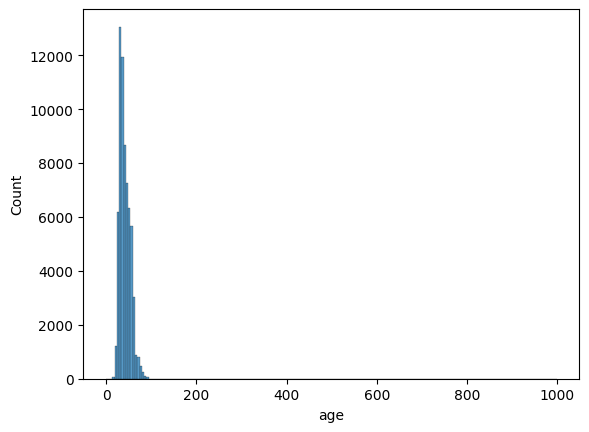

In [193]:
sns.histplot(x=df.age,bins=200)

<Axes: xlabel='balance'>

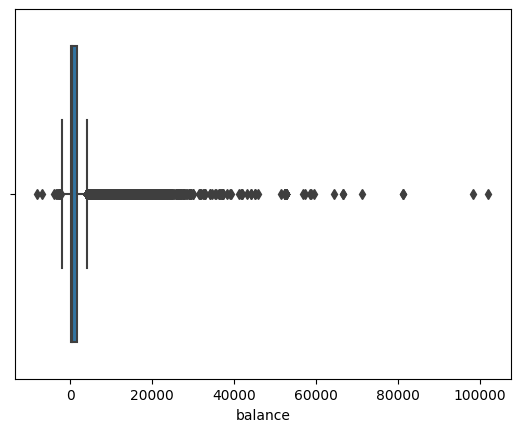

In [165]:
sns.boxplot(x=df.balance)

<Axes: xlabel='pdays', ylabel='Count'>

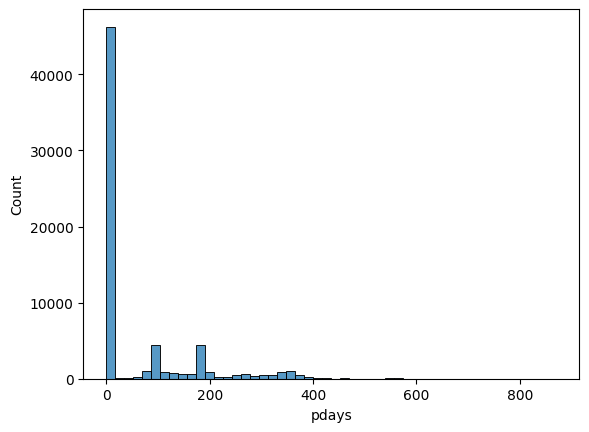

In [166]:
sns.histplot(x=df.pdays,bins=50)

## Preprocessing

In [167]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    Q1=df['balance'].quantile(0.25)
    Q3=df['balance'].quantile(0.75)
    IQR = Q3-Q1
    df=df[(df['balance'] > Q1 - (1.5 * IQR))]
    df=df[(df['age'] < 100)]
    return df

# Đối với cột balance thì áp dụng thống kê để loại bỏ các giá trị bất thường
# cột age thì lấy các giá trị nhỏ hơn 100, điều này phù hợp với độ tuổi của con người
# Các cột numeric khác em chưa biết thông tin về nó nên em sẽ giữ nguyên.

In [168]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
def normalize_data(df):
    numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
    categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == 'object') & (feature != 'y'))]
    #Sử dụng One-hot Encoding để chuẩn hóa dữ liệu categorical
    df_cat_scaled=pd.get_dummies(df[categorical_features],columns=categorical_features).astype('int')
    # Chuyển đổi giá trị trong cột y thành 0 và 1
    df['y'] = (df.y == 'yes').astype('int')
    new_df=pd.concat([df[numerical_features],df_cat_scaled,df['y']], axis=1)
    scaler=StandardScaler()
    new_df[numerical_features]=scaler.fit_transform(new_df[numerical_features])
    return new_df

In [173]:
new_df=normalize_data(df.copy())

In [174]:
new_df

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.482444,0.256685,-1.604484,-0.587691,-0.186496,0.257563,0.016219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,-1.288329,-0.398080,-0.198810,-0.477790,-0.186496,0.466273,0.426129,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-1.288329,-0.397768,-0.198810,-0.475401,-0.186496,0.466273,0.426129,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,-1.288329,-0.397456,-0.198810,-0.473012,-0.186496,0.466273,0.426129,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,-1.288329,-0.397143,-0.198810,-0.470623,-0.186496,0.466273,0.426129,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66019,-3.565037,-0.319983,0.152608,-0.054910,-0.186496,-0.548814,-0.393690,0,0,0,...,0,0,1,0,0,0,0,0,1,1
66020,2.506185,0.062380,0.152608,0.112330,-0.186496,-0.548814,-0.393690,0,0,0,...,0,0,1,0,0,0,0,0,1,1
66021,2.590508,1.307559,0.152608,1.715450,0.921783,1.206242,0.836038,0,0,0,...,0,0,1,0,0,0,0,1,0,1
66022,1.325670,-0.269064,0.152608,0.236566,0.552357,-0.548814,-0.393690,0,1,0,...,0,0,1,0,0,0,0,0,1,0


<Axes: >

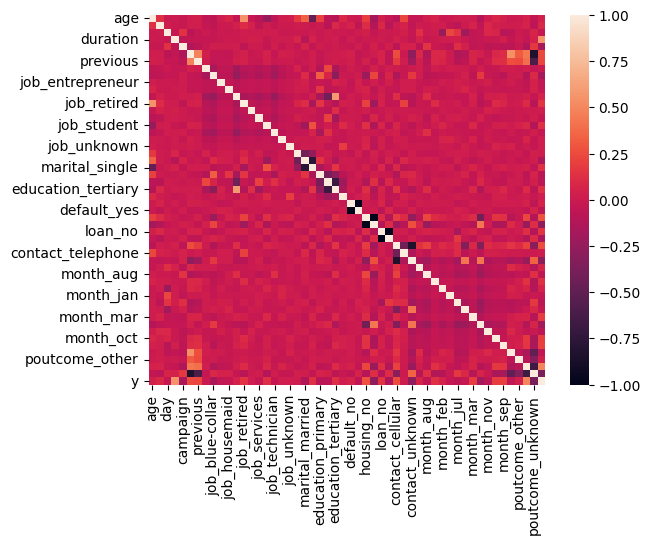

In [176]:
# Heatmap
import seaborn as sns

new_df = normalize_data(df.copy())
sns.heatmap(new_df.corr()) # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [178]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    X = df.drop('y',axis=1)
    y = df.y
    return X, y

X, y = prepare_X_y(new_df)

In [181]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X,y,train_size=train_size,random_state=42)
    
    # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [182]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(46209, 51)
Test:(19804, 51)


## Basic Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression()
    model.fit(X,y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  0.1985871723784869
mean absolute error of linear model on test set  0.2005546938118562
[-6.74462657e-03  8.19194050e-03  1.11941479e-02  2.77545392e-01
 -1.23192615e-02 -1.55906959e-02  3.17135728e-04 -3.55456102e+11
 -3.55456102e+11 -3.55456102e+11 -3.55456102e+11 -3.55456102e+11
 -3.55456102e+11 -3.55456102e+11 -3.55456102e+11 -3.55456102e+11
 -3.55456102e+11 -3.55456102e+11 -3.55456102e+11  1.33720140e+12
  1.33720140e+12  1.33720140e+12  6.22508246e+12  6.22508246e+12
  6.22508246e+12  6.22508246e+12  3.30436263e+10  3.30436263e+10
 -1.37391130e+12 -1.37391130e+12  1.01472067e+11  1.01472067e+11
  2.48317084e+11  2.48317084e+11  2.48317084e+11 -2.83032839e+10
 -2.83032839e+10 -2.83032839e+10 -2.83032839e+10 -2.83032839e+10
 -2.83032839e+10 -2.83032839e+10 -2.83032839e+10 -2.83032839e+10
 -2.83032839e+10 -2.83032839e+10 -2.83032839e+10 -3.80948674e+11
 -3.80948674e+11 -3.80948674e+11 -3.80948674e+11]

-5806497272779.763


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

def build_lasso_model(X, y):
    model = Lasso(alpha=1.0)
    model.fit(X,y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  0.4788089801861612
mean absolute error of linear model on test set  0.4777747983605562
[ 0.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0.  0.
  0.  0. -0.  0. -0. -0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.
 -0.  0.  0. -0. -0. -0.  0. -0. -0.  0.  0. -0.  0.  0. -0.]

0.3970655067194702


In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

def build_ridge_model(X, y):
    model = Ridge(alpha=1.0)
    model.fit(X,y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  0.1982862625526816
mean absolute error of linear model on test set  0.2000654772747042
[-6.74863412e-03  8.14831900e-03  1.22994618e-02  2.77228990e-01
 -1.24240595e-02 -1.54487576e-02 -2.38971555e-04  2.07299311e-02
 -2.66805868e-02 -1.25554298e-02 -4.92288371e-02 -4.58681190e-03
  9.34874135e-02 -2.10216479e-02 -1.49359049e-02  1.00317078e-01
 -1.36667661e-02 -4.24340159e-02 -2.94244223e-02 -5.08768049e-03
 -1.47127995e-02  1.98004800e-02 -2.58434205e-02 -1.35928606e-02
  1.64744259e-02  2.29618551e-02  4.57851797e-03 -4.57851797e-03
  4.34284391e-02 -4.34284391e-02  2.43825011e-02 -2.43825012e-02
  6.70584065e-02  2.73075735e-02 -9.43659800e-02 -3.96591897e-02
 -1.36169493e-01  1.59674040e-01 -4.90014647e-02 -2.32102212e-01
 -1.37001218e-01  7.94177885e-03  3.51168798e-01 -7.05241645e-02
 -1.59457195e-01  1.68104031e-01  1.37026288e-01 -1.26276815e-01
 -7.11489274e-02  3.67092560e-01 -1.69666818e-01]

0.47258701474621273


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

def build_elastic_model(X, y):
    model = ElasticNet(alpha=1.0,l1_ratio=0.5)
    model.fit(X,y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  0.4788089801861612
mean absolute error of linear model on test set  0.4777747983605562
[ 0.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0.  0.
  0.  0. -0.  0. -0. -0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.
 -0.  0.  0. -0. -0. -0.  0. -0. -0.  0.  0. -0.  0.  0. -0.]

0.3970655067194702


## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

def build_pipeline(X, y, degree=1):
    poly_model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    poly_model.fit(X, y)  

    return poly_model

# Usage example
# Assuming you have defined your trainX, trainY, testX, and testY

# Build polynomial regression model with degree 2
poly_model = build_pipeline(trainX, trainY, degree=2)

# Compare on training dataset
poly_pred_train = poly_model.predict(trainX)
print("Mean Absolute Error of linear model (with poly transform) on train set:", mean_absolute_error(y_pred=poly_pred_train, y_true=trainY))

# Compare on test dataset
poly_pred_test = poly_model.predict(testX)
print("Mean Absolute Error of linear model (with poly transform) on test set:", mean_absolute_error(y_pred=poly_pred_test, y_true=testY))


Mean Absolute Error of linear model (with poly transform) on train set: 0.15569212232279653
Mean Absolute Error of linear model (with poly transform) on test set: 518.592954032801
